In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline

In [7]:
def read_data(fn):
    data = pd.read_csv(fn)
    data["Dates"] = ""
    data["time_rs"] = 0.0

    for i in range(data.shape[0]):
        dt = datetime.fromtimestamp(data.iloc[i]['timestamp'] // 1000)
        data.at[i, 'Dates'] = dt

        m = (data.iloc[i]['sunset'] + data.iloc[i]['sunrise']) // 2

        if data.iloc[i]['timestamp'] < m:
            time_rs = (data.iloc[i]['timestamp'] - data.iloc[i]['sunrise']) / \
            (m - data.iloc[i]['sunrise'])
        else:
            time_rs = (data.iloc[i]['sunset'] - data.iloc[i]['timestamp']) / \
            (data.iloc[i]['sunset'] - m)

        data.at[i, 'time_rs'] = time_rs

    data = data.set_index('Dates')
    data = data.drop(['timestamp','sunrise','sunset'], axis=1) 

    cols = list(data.columns)
    a, b = cols.index('pwr'), cols.index('time_rs')
    cols[b], cols[a] = cols[a], cols[b]
    data = data[cols]
    
    return data

In [43]:
df = read_data('all_owm.csv')

data_X = df.drop('pwr', axis = 1)
data_Y = df.pwr

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=7)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
regr = RandomForestRegressor(n_estimators=75, max_depth=7, min_samples_split=3, random_state=0)
regr.fit(X_train, y_train)

y_train_hat = regr.predict(X_train)
y_test_hat = regr.predict(X_test)

print("Error metrics of training data")

RMSE = np.sqrt(mean_squared_error(y_train, y_train_hat))
print("RMSE or Root mean squared error: %.2f" % RMSE)  

MAE = mean_absolute_error(y_train, y_train_hat)
print('Mean Absolute Error: %.2f' % MAE)

R2 = r2_score(y_train, y_train_hat)
print('Variance score: %.2f' % R2 )

print("Error metrics of test data")

RMSE = np.sqrt(mean_squared_error(y_test, y_test_hat))
print("RMSE or Root mean squared error: %.2f" % RMSE)  

MAE = mean_absolute_error(y_test, y_test_hat)
print('Mean Absolute Error: %.2f' % MAE)

R2 = r2_score(y_test, y_test_hat)
print('Variance score: %.2f' % R2 )

Error metrics of training data
RMSE or Root mean squared error: 30.06
Mean Absolute Error: 22.68
Variance score: 0.52
Error metrics of test data
RMSE or Root mean squared error: 36.81
Mean Absolute Error: 28.47
Variance score: 0.27


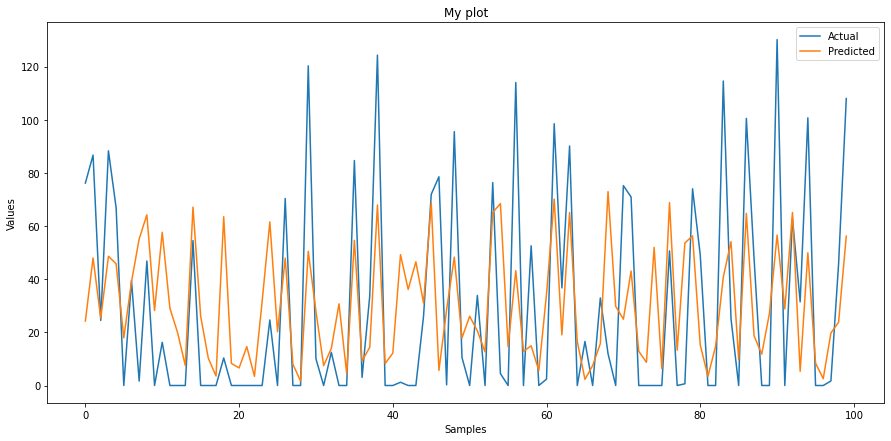

In [40]:
plt.figure(figsize = (15,7))
_ = plt.plot(y_test[:100].values, label='Actual')
_ = plt.plot(y_test_hat[:100], label='Predicted')

# set labels, legends and show plot
_ = plt.xlabel('Samples')
_ = plt.ylabel('Values')
_ = plt.legend()
_ = plt.title('My plot')

Text(0, 0.5, 'Predicted')

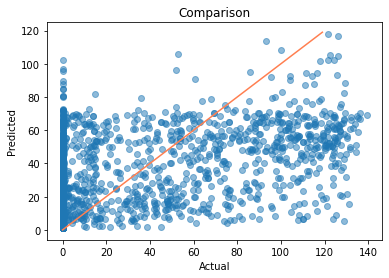

In [41]:
x = np.arange(120)
plt.plot(x,x,color='coral')

plt.scatter(y_test, y_test_hat, alpha=0.5)
plt.title('Comparison')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Feature:       temp, Score: 0.46523
Feature:   humidity, Score: 0.21189
Feature:       rain, Score: 0.04088
Feature:      cloud, Score: 0.16501
Feature: visibility, Score: 0.11700


<BarContainer object of 5 artists>

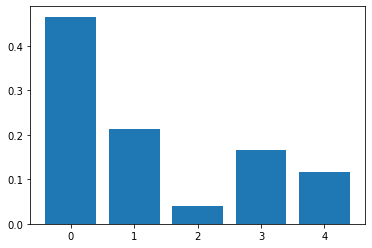

In [42]:
importance = regr.feature_importances_
# summarize feature importance
for i,v in zip(list(X_train),importance):
    print('Feature: %10s, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

In [44]:
df

,temp,humidity,rain,cloud,visibility,time_rs,pwr
Dates,,,,,,,
2020-02-18 00:00:00,22.00,56.0,0.0,0.0,90.0,-1.06,0.0
2020-02-18 01:00:00,21.00,56.0,0.0,0.0,90.0,-0.88,0.0
2020-02-18 02:00:00,20.00,60.0,0.0,0.0,80.0,-0.70,0.0
2020-02-18 03:00:00,19.00,63.0,0.0,0.0,80.0,-0.52,0.0
2020-02-18 04:00:00,19.00,63.0,0.0,0.0,80.0,-0.34,0.0
...,...,...,...,...,...,...,...
2020-10-31 19:00:00,26.00,88.0,0.0,75.0,100.0,-0.28,0.0
2020-10-31 20:00:00,25.78,88.0,0.0,40.0,100.0,-0.46,0.0
2020-10-31 21:00:00,26.00,83.0,0.0,40.0,100.0,-0.64,0.0


In [53]:
df = read_data('all_owm.csv')

# Creating the lag variables
for i in range(72,96):
    df['lag'+str(i)] = df['pwr'].shift(i)
    
df_lag = df.dropna()

data_X = df_lag.drop('pwr', axis = 1)
data_Y = df_lag.pwr

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3, random_state=7)

In [56]:
regr = RandomForestRegressor(n_estimators=17, max_depth=13, min_samples_split=4, random_state=0)
regr.fit(X_train, y_train)

y_train_hat = regr.predict(X_train)
y_test_hat = regr.predict(X_test)

print("Error metrics of training data")

RMSE = np.sqrt(mean_squared_error(y_train, y_train_hat))
print("RMSE or Root mean squared error: %.2f" % RMSE)  

MAE = mean_absolute_error(y_train, y_train_hat)
print('Mean Absolute Error: %.2f' % MAE)

R2 = r2_score(y_train, y_train_hat)
print('Variance score: %.2f' % R2 )

print("Error metrics of test data")

RMSE = np.sqrt(mean_squared_error(y_test, y_test_hat))
print("RMSE or Root mean squared error: %.2f" % RMSE)  

MAE = mean_absolute_error(y_test, y_test_hat)
print('Mean Absolute Error: %.2f' % MAE)

R2 = r2_score(y_test, y_test_hat)
print('Variance score: %.2f' % R2 )

Error metrics of training data
RMSE or Root mean squared error: 7.15
Mean Absolute Error: 3.54
Variance score: 0.97
Error metrics of test data
RMSE or Root mean squared error: 13.59
Mean Absolute Error: 6.82
Variance score: 0.90
